### Lab1_2447218

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Q1: Data Loading and Exploration
Load the dataset and plot your data set using any 4 different graphs using a variety of
variables


In [50]:
df = pd.read_csv("Absenteeism_at_work_with_reasons.csv", sep=';')

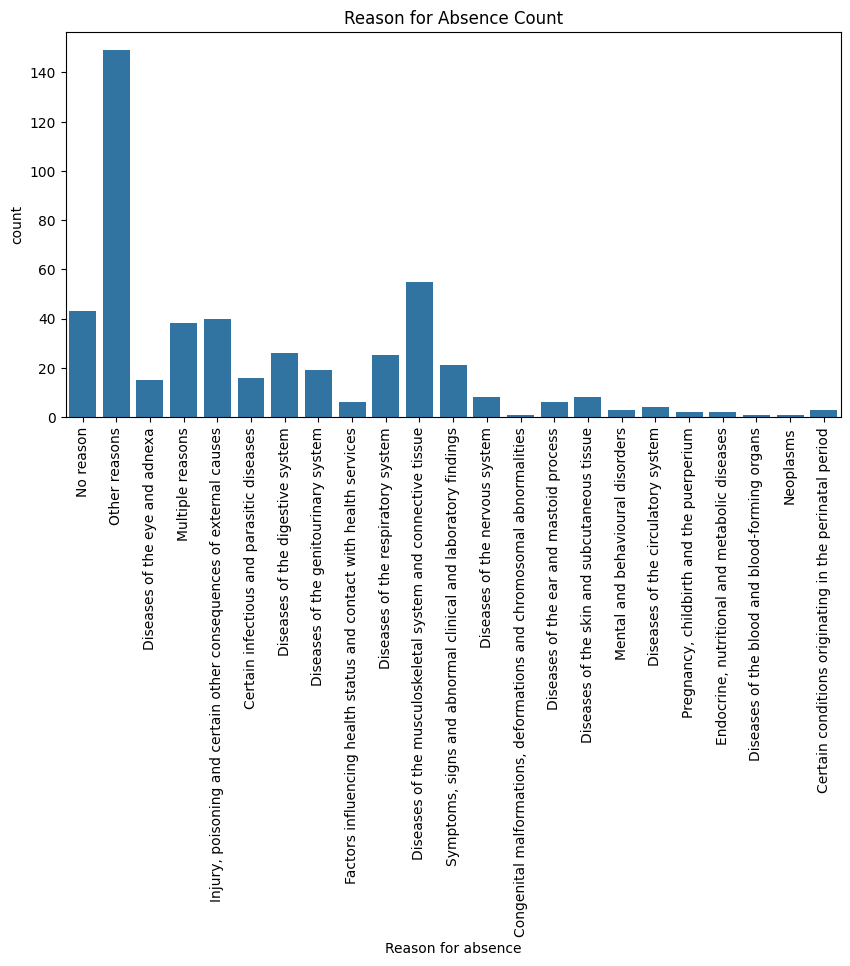

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Reason for absence")
plt.title("Reason for Absence Count")
plt.xticks(rotation=90)
plt.show()

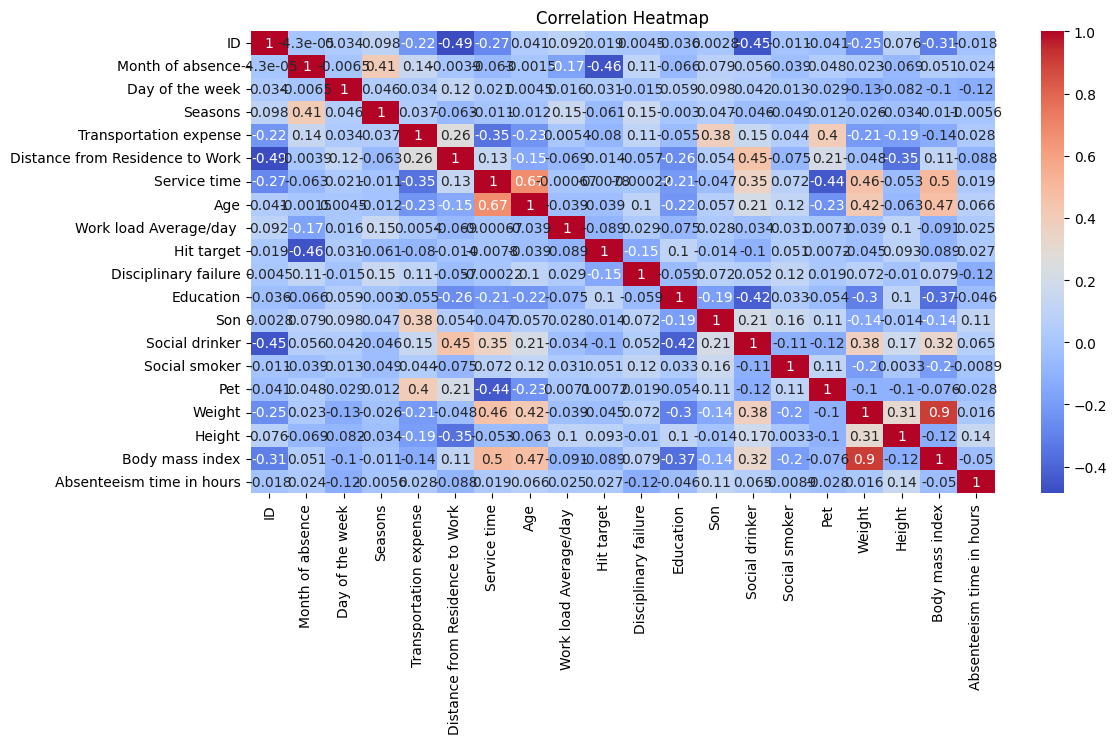

In [52]:
# Plot 2: Heatmap of correlations
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

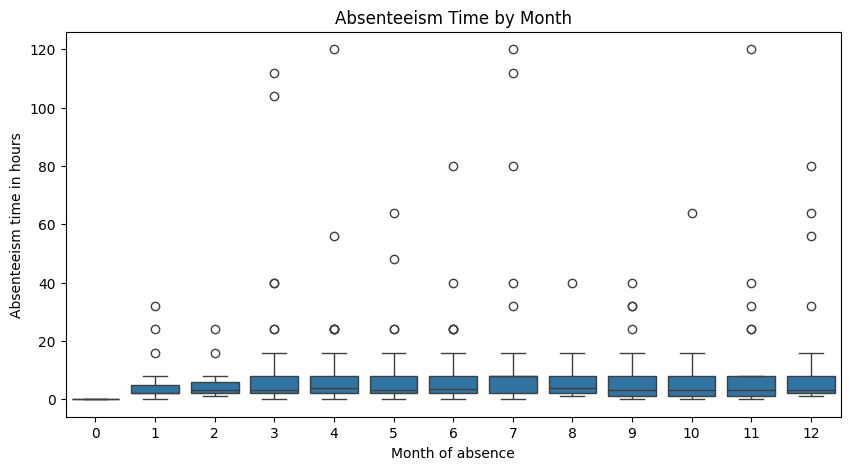

In [53]:
# Plot 3: Boxplot of 'Absenteeism time in hours' by 'Month of absence'
plt.figure(figsize=(10, 5))
sns.boxplot(x="Month of absence", y="Absenteeism time in hours", data=df)
plt.title("Absenteeism Time by Month")
plt.show()

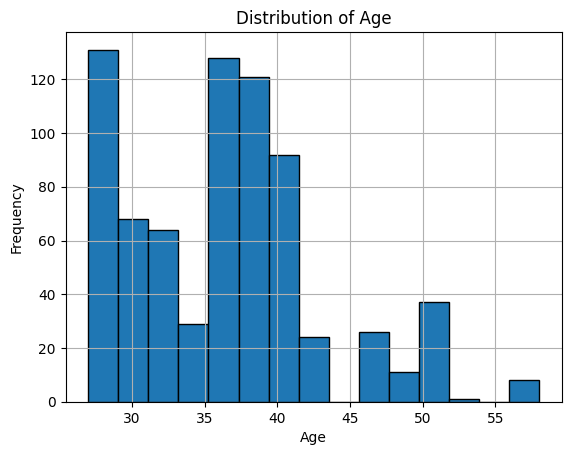

In [54]:
# Plot 4: Histogram of 'Age'
df['Age'].hist(bins=15, edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### Q2: Understanding data
- 2.1 Display number of samples (row) and number of attributes(columns) in your data set
- 2.2 Display all columns names in your data set
- 2.3 Display the structure of the data frame
- 2.4 Display the statistical information about the dataset
- 2.5 Display no of samples based on particular coloumn

In [55]:
# Q2: Understanding Data
print("2.1 Number of rows and columns:", df.shape)
print("2.2 Column names:\n", df.columns.tolist())
print("2.3 DataFrame info:")
print(df.info())
print("2.4 Statistical description:")
print(df.describe())
print("2.5 Sample count by 'Reason for absence':")
print(df["Reason for absence"].value_counts())


2.1 Number of rows and columns: (740, 21)
2.2 Column names:
 ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']
2.3 DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               492 non-null    object 
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation exp

#### Q3: Extracting independent variables and dependent variables in your dataset and interpret the difference between independent and dependent variables.

In [56]:
# Q3: Independent vs Dependent Variables using iloc
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # Last column (Absenteeism time in hours)
print("Independent Variables (X):", X.columns.tolist())
print("Dependent Variable (y):", y.name)

Independent Variables (X): ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
Dependent Variable (y): Absenteeism time in hours


#### Q4: Find unique values from a column in a Data frame &amp; count the unique values from a column in a Data frame.

In [57]:
# Q4: Unique values in column
print("Unique 'Reason for absence':", df["Reason for absence"].unique())
print("Count of unique 'Reason for absence':", df["Reason for absence"].nunique())

Unique 'Reason for absence': [nan 'No reason' 'Other reasons' 'Diseases of the eye and adnexa'
 'Multiple reasons'
 'Injury, poisoning and certain other consequences of external causes'
 'Certain infectious and parasitic diseases'
 'Diseases of the digestive system' 'Diseases of the genitourinary system'
 'Factors influencing health status and contact with health services'
 'Diseases of the respiratory system'
 'Diseases of the musculoskeletal system and connective tissue'
 'Symptoms, signs and abnormal clinical and laboratory findings'
 'Diseases of the nervous system'
 'Congenital malformations, deformations and chromosomal abnormalities'
 'Diseases of the ear and mastoid process'
 'Diseases of the skin and subcutaneous tissue'
 'Mental and behavioural disorders' 'Diseases of the circulatory system'
 'Pregnancy, childbirth and the puerperium'
 'Endocrine, nutritional and metabolic diseases'
 'Diseases of the blood and blood-forming organs' 'Neoplasms'
 'Certain conditions originating

#### Q5: Find the missing values and non-missing values in your dataset.

In [58]:
# Q5: Missing/Non-missing values
print("Missing values:\n", df.isnull().sum())
print("Non-missing values:\n", df.notnull().sum())

Missing values:
 ID                                   0
Reason for absence                 248
Month of absence                     0
Day of the week                      0
Seasons                              0
Transportation expense               0
Distance from Residence to Work      0
Service time                         0
Age                                  0
Work load Average/day                0
Hit target                           0
Disciplinary failure                 0
Education                            0
Son                                  0
Social drinker                       0
Social smoker                        0
Pet                                  0
Weight                               0
Height                               0
Body mass index                      0
Absenteeism time in hours            0
dtype: int64
Non-missing values:
 ID                                 740
Reason for absence                 492
Month of absence                   740
Day of the we

#### Q6: Handling Missing data in your dataset by deleting the particular row &amp; replacing the missing value with another value.
While removing duplicate values consider the following
- Considers first value as unique and rest of the same values as duplicate.
- Considers last value as unique and rest of the same values as duplicate.
- Consider all of the same values as duplicates
- Drop null value columns which cross the threshold

In [59]:
# Q6: Handling Missing Data

# Replace missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Remove duplicates (3 strategies)
df_first = df.drop_duplicates(keep='first')   # Keep first occurrence
df_last = df.drop_duplicates(keep='last')     # Keep last occurrence
df_all = df.drop_duplicates(keep=False)       # Remove all duplicates

# Drop columns with >30% nulls
threshold = len(df) * 0.3
df.dropna(thresh=threshold, axis=1, inplace=True)

#### Q7: Encode the Categorical data in your dataset using LabelEncoder

In [60]:
# Q7: Encode Categorical Variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
if df["Education"].dtype == 'object':
    df["Education"] = le.fit_transform(df["Education"])

#### Q8: Split your dataset into training and test set in such a way that 75% of data is used for training and 25% of data is used for testing. Use the parameter random_state and identify the difference.

In [61]:
# Q8: Train-Test Split
from sklearn.model_selection import train_test_split

# Split with random_state=42
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)
print("Split 1 - Train shape:", X_train1.shape, "Test shape:", X_test1.shape)

# Split with random_state=7
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.25, random_state=7)
print("Split 2 - Train shape:", X_train2.shape, "Test shape:", X_test2.shape)

# Check if the splits are different
print("Are test sets equal?", X_test1.equals(X_test2))

Split 1 - Train shape: (555, 20) Test shape: (185, 20)
Split 2 - Train shape: (555, 20) Test shape: (185, 20)
Are test sets equal? False


#### Q9: Perform feature scaling by means of Standardization or Z score technique and interpret how each standardized value is computed.

In [62]:
# Q9: Feature Scaling - Standardization (Z-score)
from sklearn.preprocessing import StandardScaler

# Standardize numeric features (excluding target)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Example: Manual Z-score calculation for 'Age'
feature = df["Age"]
z_scores = (feature - feature.mean()) / feature.std()

print("First 5 Z-scores for 'Age':\n", z_scores.head())

# Interpretation:
print(
    "\nInterpretation:\n"
    "Each standardized value (Z-score) is computed as:\n"
    "    Z = (x - mean) / std\n"
    "where x is the original value, mean is the average of the feature, "
    "and std is the standard deviation. This rescales the feature to have mean 0 and std 1."
)


First 5 Z-scores for 'Age':
 0   -0.532508
1    2.091446
2    0.239243
3    0.393593
4   -0.532508
Name: Age, dtype: float64

Interpretation:
Each standardized value (Z-score) is computed as:
    Z = (x - mean) / std
where x is the original value, mean is the average of the feature, and std is the standard deviation. This rescales the feature to have mean 0 and std 1.


#### Q10: Perform Normalization using min max scalar and by using normalize method and interpret the difference between Standardization and Normalization.

In [63]:
# Q10: Normalization
from sklearn.preprocessing import MinMaxScaler, normalize

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X_numeric)

# Normalization (L2 norm by default)
X_normalized = normalize(X_numeric)

print("Shape after Min-Max Normalization:", X_minmax.shape)
print("Shape after Normalization:", X_normalized.shape)

# Interpretation
print(
    "\nInterpretation:\n"
    "Standardization (Z-score scaling) transforms features to have mean=0 and std=1. "
    "It preserves outliers and is useful for algorithms that assume Gaussian distribution.\n"
    "Normalization (Min-Max scaling) rescales features to a fixed range (usually [0,1]), "
    "which is sensitive to outliers. The 'normalize' method rescales each sample (row) to unit norm, "
    "which is useful for distance-based algorithms."
)

Shape after Min-Max Normalization: (740, 19)
Shape after Normalization: (740, 19)

Interpretation:
Standardization (Z-score scaling) transforms features to have mean=0 and std=1. It preserves outliers and is useful for algorithms that assume Gaussian distribution.
Normalization (Min-Max scaling) rescales features to a fixed range (usually [0,1]), which is sensitive to outliers. The 'normalize' method rescales each sample (row) to unit norm, which is useful for distance-based algorithms.
